https://www.kaggle.com/neuromusic/avocado-prices#avocado.csv

In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [4]:
# from google.colab import drive
# drive.mount('/content/drive/dataset/avacado.csv')

In [2]:
dataset= pd.read_csv("avocado.csv")

In [ ]:
dataset.head(2)

Date  AveragePrice  Total Volume  ...          type  year  region
0  2015-12-27          1.33      64236.62  ...  conventional  2015  Albany
1  2015-12-20          1.35      54876.98  ...  conventional  2015  Albany

[2 rows x 13 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
dataset.describe(include='O')

Date          type   region
count        18249         18249    18249
unique         169             2       54
top     2016-03-20  conventional  TotalUS
freq           108          9126      338

In [ ]:
dataset.type = dataset.type.map({'conventional':0})

In [ ]:
dataset.type.unique()

array([ 0., nan])

In [ ]:
dataset.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region           object
dtype: object

In [ ]:
X= dataset[['Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags','type']]
y= dataset.iloc[:,1]

In [ ]:
X.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
dtype: object

In [ ]:
importances = X.apply(lambda x: x.corr(y))
indices = np.argsort(importances)
importances[indices].fillna(0)
# print(importances[indices])

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
type            0.000000
dtype: float64

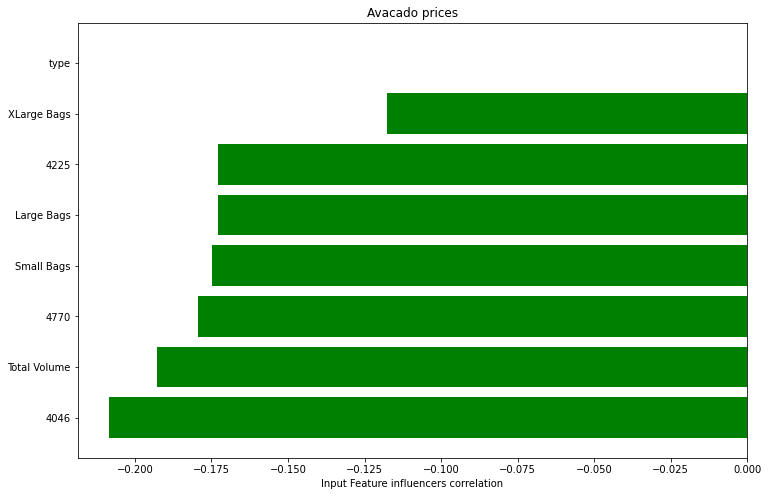

In [ ]:
names=['Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags','type']
plt.title('Avacado prices')
plt.barh(range(len(indices)), importances[indices].fillna(0), color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Input Feature influencers correlation')
plt.show()

In [ ]:
X.dtypes

Total Volume    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
dtype: object

In [ ]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(dataset["Date"])
train_dataset['y']=y
train_dataset.head(2)

ds     y
0 2015-12-27  1.33
1 2015-12-20  1.35

In [ ]:
train_dataset.tail()

ds     y
18244 2018-02-04  1.63
18245 2018-01-28  1.71
18246 2018-01-21  1.87
18247 2018-01-14  1.93
18248 2018-01-07  1.62

In [ ]:
prophet_basic = Prophet( )
prophet_basic.fit(train_dataset)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(2)

ds
18547 2019-01-18
18548 2019-01-19

In [ ]:
forecast=prophet_basic.predict(future)

In [ ]:
forecast.head()

ds     trend  ...  multiplicative_terms_upper      yhat
0 2015-01-04  1.499585  ...                         0.0  1.381923
1 2015-01-04  1.499585  ...                         0.0  1.381923
2 2015-01-04  1.499585  ...                         0.0  1.381923
3 2015-01-04  1.499585  ...                         0.0  1.381923
4 2015-01-04  1.499585  ...                         0.0  1.381923

[5 rows x 16 columns]

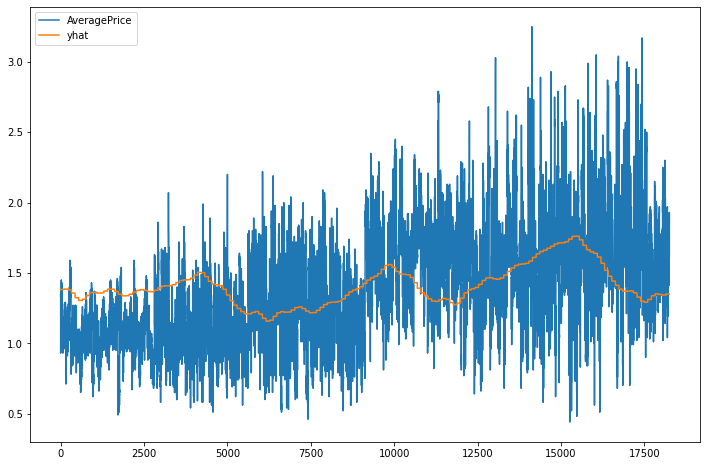

In [ ]:
dataset['yhat'] = forecast['yhat']
dataset['AveragePrice'].plot(legend=True)
plt.rcParams["figure.figsize"] = (12,8) 
dataset['yhat'].plot(legend= True)

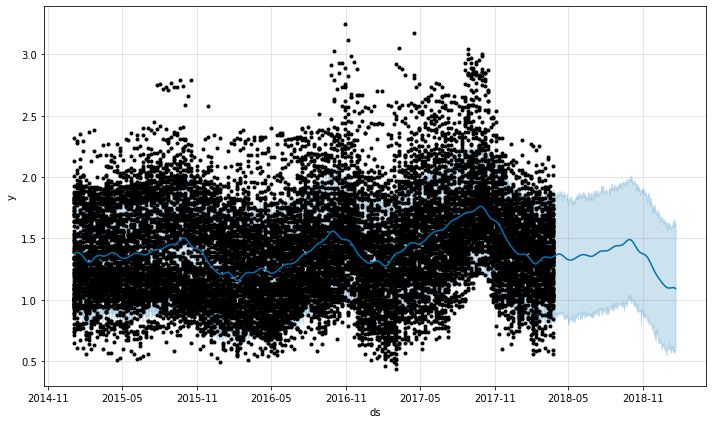

In [ ]:
fig1 =prophet_basic.plot(forecast)

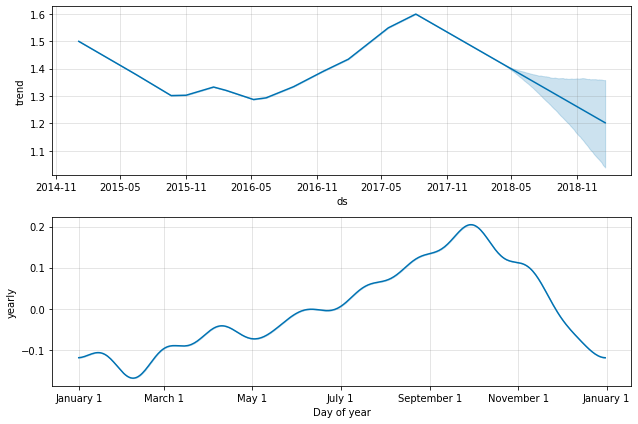

In [ ]:
# to view  the forecast components
fig1 = prophet_basic.plot_components(forecast)

__By default, Prophet adds 25 changepoints into the initial 80% of the data-set. The number of changepoints can be set by using the n_changepoints parameter when initializing prophet (e.g., model=Prophet(n_changepoints=30)__

__Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible__


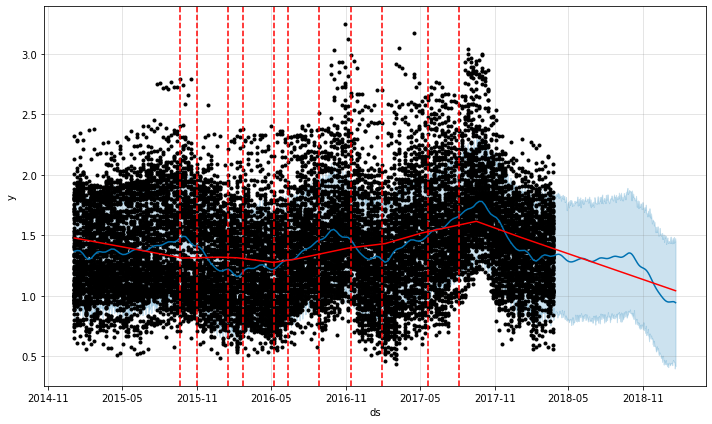

In [ ]:
#Change points
#Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [ ]:
prophet_basic.changepoints

282    2015-02-08
563    2015-03-15
845    2015-04-19
1127   2015-05-24
1409   2015-07-05
1690   2015-08-09
1972   2015-09-13
2254   2015-10-18
2535   2015-11-22
2817   2016-01-03
3099   2016-02-07
3381   2016-03-13
3662   2016-04-17
3944   2016-05-29
4226   2016-07-03
4508   2016-08-07
4789   2016-09-11
5071   2016-10-16
5353   2016-11-27
5634   2017-01-01
5916   2017-02-05
6198   2017-03-12
6480   2017-04-23
6761   2017-05-28
7043   2017-07-02
Name: ds, dtype: datetime64[ns]

__Prophet will also let us take a look at the magnitudes of these possible changepoints__

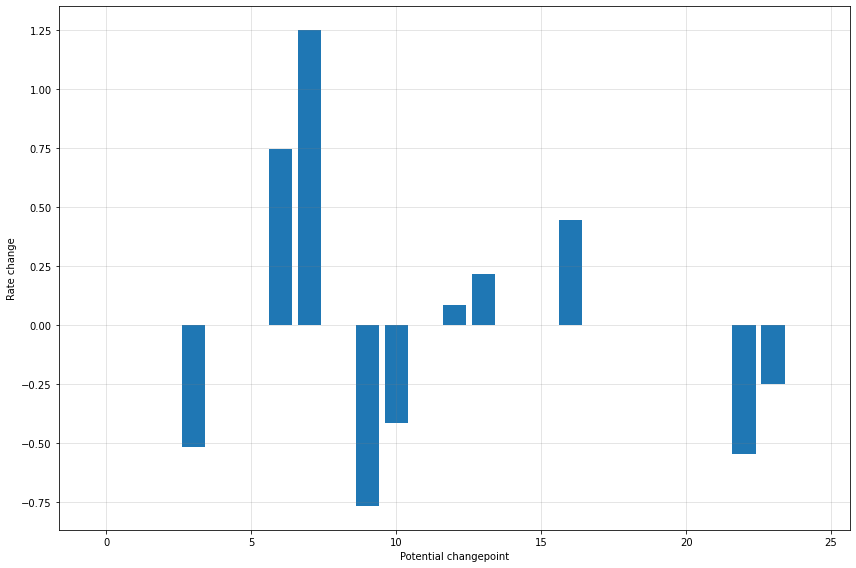

In [ ]:
deltas = prophet_basic.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

By default __changepoints__ are only inferred for the __first 80%__ of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


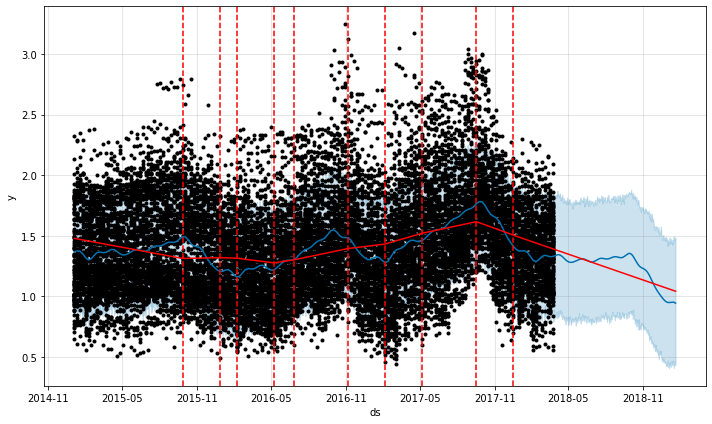

In [ ]:
pro_change= Prophet(changepoint_range=0.95, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


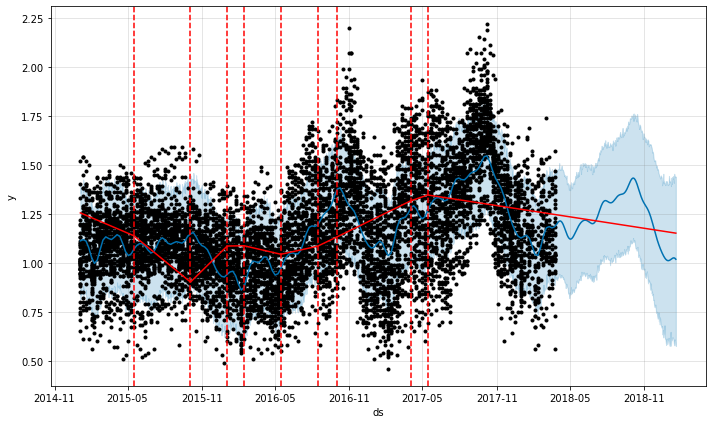

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


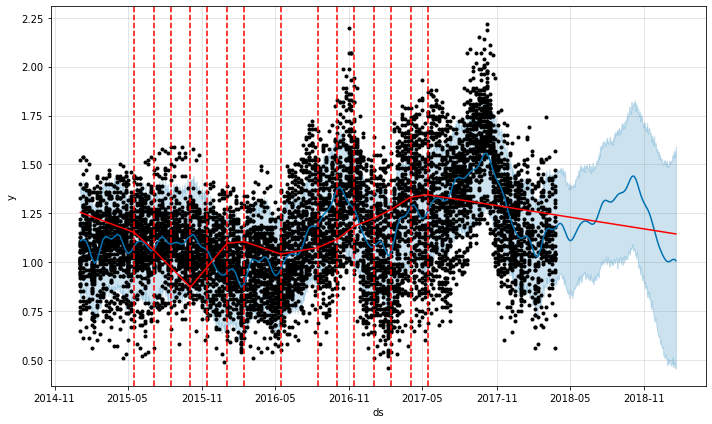

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


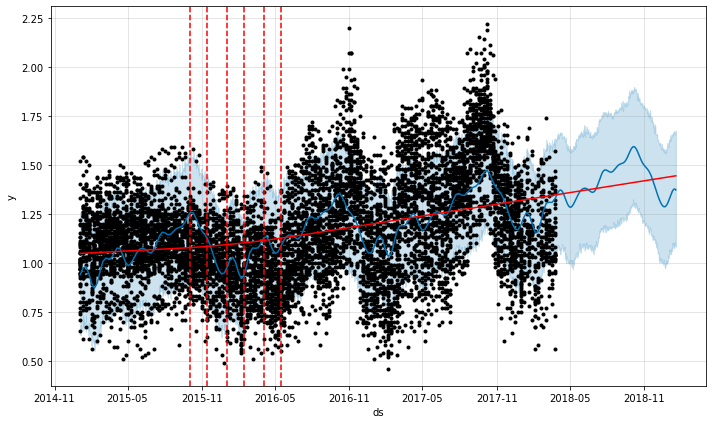

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True,changepoint_prior_scale=0.001)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


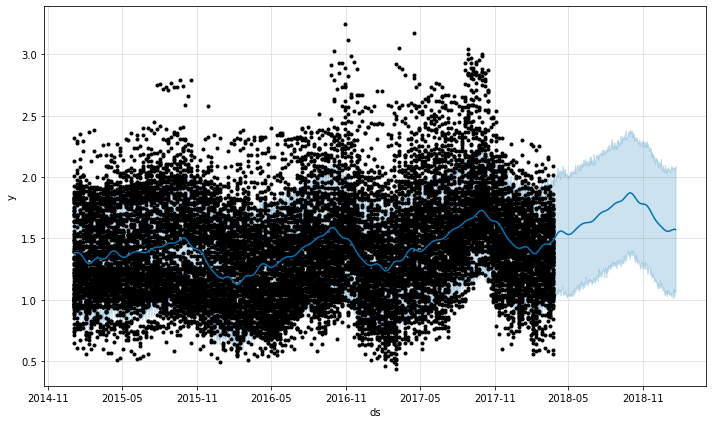

In [ ]:
pro1 = Prophet(changepoints=[
               '2015-09-23', '2016-06-22'])
forecast = pro1.fit(train_dataset).predict(future)
pro1.plot(forecast);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


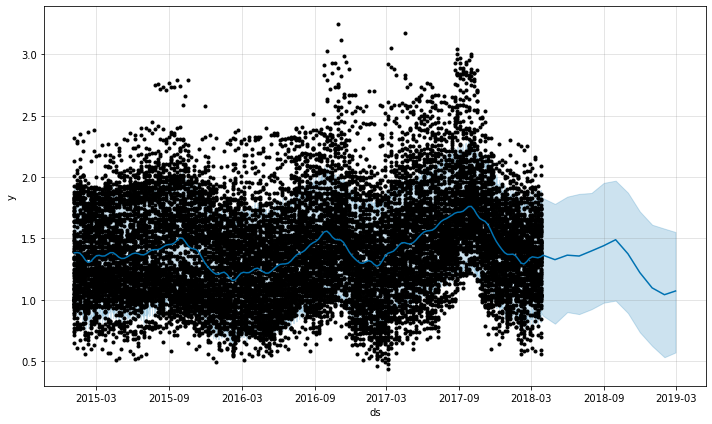

In [ ]:
#create 12 months of future data
pro1= Prophet()
pro1.fit(train_dataset)
future_data = pro1.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro1.predict(future_data)
pro1.plot(forecast_data);

In [ ]:
avocado_season = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


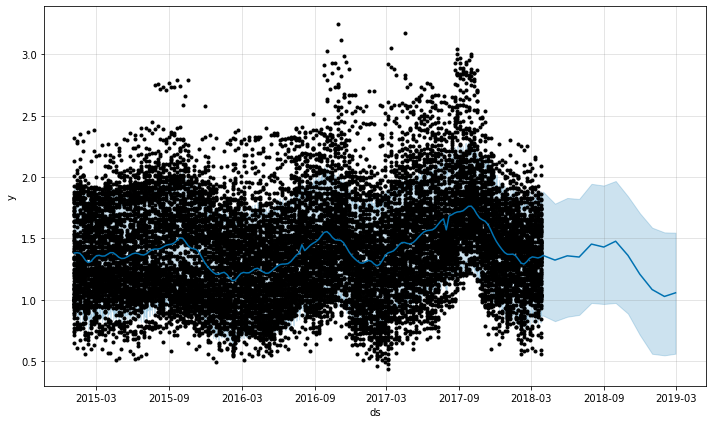

In [ ]:
pro_holiday= Prophet(holidays=avocado_season)
pro_holiday.fit(train_dataset)
future_data = pro_holiday.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro_holiday.predict(future_data)
pro_holiday.plot(forecast_data);

In [ ]:
train_dataset['type'] = X['type']
train_dataset['Total Volume'] = X['Total Volume']
train_dataset['4046'] = X['4046']
train_dataset['4225'] = X['4225']
train_dataset['4770'] = X['4770']
train_dataset['Small Bags'] = X['Small Bags']

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            18249 non-null  datetime64[ns]
 1   y             18249 non-null  float64       
 2   type          9126 non-null   float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.1 MB


In [ ]:
train_X= train_dataset[:16000]
test_X= train_dataset[16001:]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


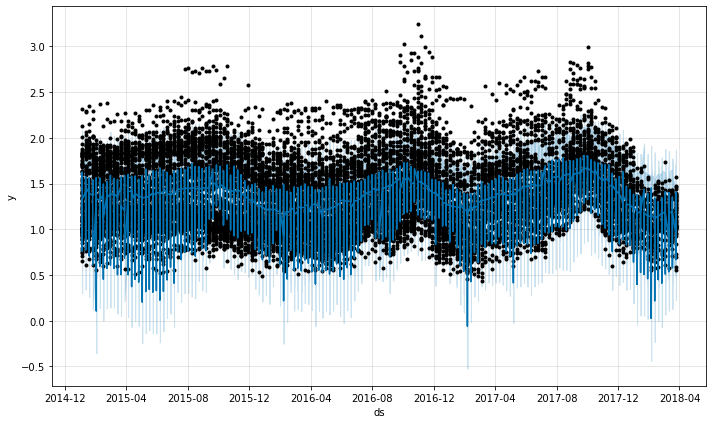

In [ ]:
#Additional Regressor
pro_regressor= Prophet()
# pro_regressor.add_regressor('type')
pro_regressor.add_regressor('Total Volume')
pro_regressor.add_regressor('4046')
pro_regressor.add_regressor('4225')
pro_regressor.add_regressor('4770')
pro_regressor.add_regressor('Small Bags')

#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)


#forecast the data for Test  data
forecast_data = pro_regressor.predict(train_dataset)
pro_regressor.plot(forecast_data);
